# **Online Retail Transactions**

## Objectives

* Analyse customer behaviour and preferences, identify popular products, and optimise pricing and marketing strategies.

## Inputs

* Data Source:  https://www.kaggle.com/datasets/abhishekrp1517/online-retail-transactions-dataset/data

## Outputs

* A Jupyter Noteboo file (ETL.ipynb) to show the analysis of data
* Code that advises on how to Optimze pricing and predicts possible succesful marketing strategies





---

# Working directory

* Changed the working directory from its current folder to its parent folder


* Access the current directory with os.getcwd()

In [4]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\jeff .LAPTOP-IGU6VVPB\\Desktop\\Code institute\\vscode-projects\\hackathon 1\\retail_transaction_analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [5]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [6]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\jeff .LAPTOP-IGU6VVPB\\Desktop\\Code institute\\vscode-projects\\hackathon 1\\retail_transaction_analysis'

# Data Extraction, Transformation, and Loading (ETL)

Importing packages

In [247]:
#Setting up & Importing packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline


* Extracting the data

In [10]:
#loading the data
df = pd.read_csv('jupyter_notebooks/Online Retail.csv')
df_copy = df.copy()

---

* Cleaning the data

Section 2 content

In [11]:
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


---

In [13]:
df_copy.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [16]:
#Fill missing Description values using StockCode group where it is possible

df_copy['Description'] = df_copy.groupby('StockCode')['Description'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


C:\Users\jeff .LAPTOP-IGU6VVPB\AppData\Local\Temp\ipykernel_12404\293228325.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy['Description'] = df_copy.groupby('StockCode')['Description'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [17]:
#check if there are still missing values in Description
df_copy['Description'].isnull().sum()

112

In [18]:
#View rows where Description is still missing
missing_description_rows = df_copy[df_copy['Description'].isnull()]
missing_description_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,15287,United Kingdom
...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,2011-07-27 14:10:00,0.0,15287,United Kingdom
281615,561555,37477B,NaN,-11,2011-07-28 10:21:00,0.0,15287,United Kingdom
281616,561557,37477C,NaN,-31,2011-07-28 10:21:00,0.0,15287,United Kingdom
346849,567207,35592T,NaN,4,2011-09-19 11:01:00,0.0,15287,United Kingdom


In [19]:
#View rows with '?' in Description
df_copy[df_copy['Description'].str.contains('\?', na=False)]

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
C:\Users\jeff .LAPTOP-IGU6VVPB\AppData\Local\Temp\ipykernel_12404\3318850241.py:1: SyntaxWarning: invalid escape sequence '\?'
  df_copy[df_copy['Description'].str.contains('\?', na=False)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,15287,United Kingdom
21518,538090,20956,?,-723,2010-12-09 14:48:00,0.0,15287,United Kingdom
22295,538160,20956,?,288,2010-12-09 17:18:00,0.0,15287,United Kingdom
38261,539494,21479,?,752,2010-12-20 10:36:00,0.0,15287,United Kingdom
43662,540100,22837,?,-106,2011-01-04 16:53:00,0.0,15287,United Kingdom
...,...,...,...,...,...,...,...,...
514649,579734,84859C,wet?,-153,2011-11-30 14:25:00,0.0,15287,United Kingdom
514735,579742,85204,lost??,-1131,2011-11-30 14:34:00,0.0,15287,United Kingdom
524370,580547,21201,???,-390,2011-12-05 09:29:00,0.0,15287,United Kingdom
535324,581201,22217,damages?,-155,2011-12-07 18:30:00,0.0,15287,United Kingdom


In [ ]:
#replace '?' in Description with an empty string

df_copy['Description'] = df_copy['Description'].str.replace('?', '', regex=False)

In [75]:
#Remove rows with negative or zero Quantity
df_copy = df_copy[df_copy['Quantity'] > 0]

#Remove rows with negative or zero UnitPrice
df_copy = df_copy[df_copy['UnitPrice'] > 0]

In [27]:
df_copy['Description'].isnull().sum()

15

In [76]:
#Create a Pipline to replace the missing values in the Description column with 'Missing'
from feature_engine.imputation import CategoricalImputer

pipeline = Pipeline([
      ('replace description',  CategoricalImputer(imputation_method='missing',
                                                   fill_value='No Description',
                                                   variables=['Description']) )
])

#Fit and transform the pipeline on the dataframe
df_copy = pipeline.fit_transform(df_copy)

c:\Users\jeff .LAPTOP-IGU6VVPB\Desktop\Code institute\vscode-projects\hackathon 1\retail_transaction_analysis\.venv\Lib\site-packages\feature_engine\imputation\categorical.py:232: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[variable]):


In [77]:
#Check if there are still any missing values in Description
df_copy['Description'].isnull().sum()

0

* We want to View Data types and then change to appropriate data types for analysis

In [34]:
df_copy.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [ ]:
#Convert InvoiceDate to datetime format and CustomerID to object type
df_copy['InvoiceDate'] = pd.to_datetime(df_copy['InvoiceDate'])

df_copy['CustomerID'] = df_copy['CustomerID'].astype(object)

# Undertsnading the data

* First we find out the Country with the Most Orders

In [78]:
#print the Top 10 Countries with most orders
top_customers_country = df_copy['Country'].value_counts().head(10)
print(top_customers_country)

Country
United Kingdom    485123
Germany             9040
France              8407
EIRE                7890
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1966
Portugal            1501
Australia           1182
Name: count, dtype: int64


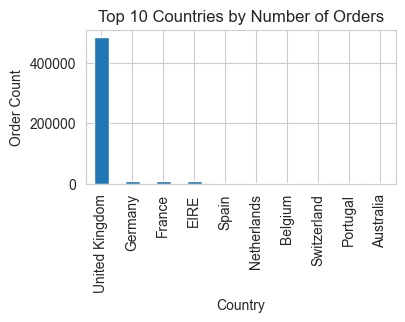

In [248]:
top_countries = df_copy['Country'].value_counts().head(10)
plt.figure(figsize=(4,2))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Number of Orders')
plt.xlabel('Country')
plt.ylabel('Order Count')
plt.show()

* We check for Top Items customers are purchasing

In [249]:
# Print descriptions and count for top 10 StockCodes

top_stockcodes = df_copy['StockCode'].value_counts().head(10).index

for code in top_stockcodes:
    count = df_copy[df_copy['StockCode'] == code].shape[0]
    descriptions = df_copy[df_copy['StockCode'] == code]['Description'].unique()
    print(f"StockCode: {code} | Count: {count}")
    print("Descriptions:", descriptions)
    print("---")

StockCode: 85123A | Count: 2265
Descriptions: ['WHITE HANGING HEART T-LIGHT HOLDER' 'CREAM HANGING HEART T-LIGHT HOLDER']
---
StockCode: 85099B | Count: 2112
Descriptions: ['JUMBO BAG RED RETROSPOT']
---
StockCode: 22423 | Count: 2017
Descriptions: ['REGENCY CAKESTAND 3 TIER']
---
StockCode: 47566 | Count: 1706
Descriptions: ['PARTY BUNTING']
---
StockCode: 20725 | Count: 1595
Descriptions: ['LUNCH BAG RED RETROSPOT' 'LUNCH BAG RED SPOTTY']
---
StockCode: 84879 | Count: 1489
Descriptions: ['ASSORTED COLOUR BIRD ORNAMENT']
---
StockCode: 22197 | Count: 1426
Descriptions: ['SMALL POPCORN HOLDER' 'POPCORN HOLDER']
---
StockCode: 22720 | Count: 1399
Descriptions: ['SET OF 3 CAKE TINS PANTRY DESIGN ']
---
StockCode: 21212 | Count: 1370
Descriptions: ['PACK OF 72 RETROSPOT CAKE CASES']
---
StockCode: 20727 | Count: 1328
Descriptions: ['LUNCH BAG  BLACK SKULL.']
---


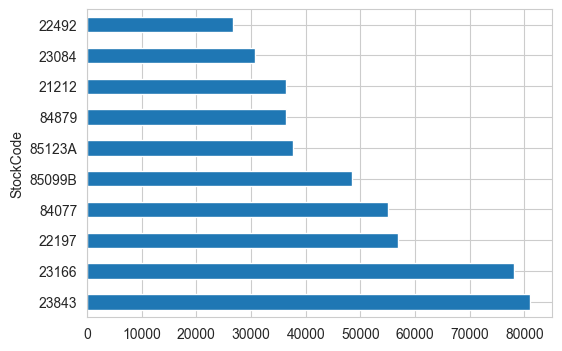

In [120]:
#horizontal bar chart of top 10 StockCodes by Quantity
top_stockcodes_quantity = df_copy.groupby('StockCode')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(6, 4))  
plt.show(top_stockcodes_quantity.plot(kind='barh'))


In [127]:
# Extract month from InvoiceDate and count purchases per month

df_copy['Month'] = df_copy['InvoiceDate'].dt.month
monthly_purchases = df_copy['Month'].value_counts().sort_index()
print(monthly_purchases)

Month
1     34306
2     27105
3     35803
4     29096
5     36164
6     35977
7     38645
8     34483
9     49261
10    59304
11    83369
12    66591
Name: count, dtype: int64


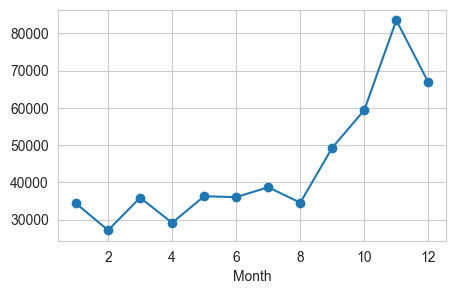

In [126]:
# line chart of monthly purchases
plt.figure(figsize=(5,3)) 
plt.show(monthly_purchases.plot(kind='line', marker='o'))   

We can see that customers tend to make more purchases in the 4th quater of the year with Novemeber being the peak month

---

# Price Optimization

* Key Value Items drive perception (if KVIs look cheap, customers may believe the store is generally affordable), so we keep them competetive and leave the price as it is.

In [79]:
  #identify key value items in the dataset
key_value_items = df_copy.groupby('StockCode').agg({'UnitPrice': 'mean', 'Quantity': 'sum'}).reset_index()
key_value_items = key_value_items.sort_values(by='Quantity', ascending=False).head(10)
print(key_value_items)


     StockCode  UnitPrice  Quantity
2465     23843   2.080000     80995
2020     23166   1.468480     78033
1109     22197   1.042468     56921
2909     84077   0.320670     55047
3387    85099B   2.485459     48474
3407    85123A   3.116949     37660
3194     84879   1.722290     36461
439      21212   0.758431     36419
1942     23084   2.380502     30788
1374     22492   0.785026     26633


* We can increase the price of Non Key Value items with low price sensitivity 

In [82]:

#find top stockcodes with low price sensitivity
low_price_sensitivity = df_copy.groupby('StockCode').agg({'UnitPrice': 'mean', 'Quantity': 'sum'}).reset_index()
low_price_sensitivity = low_price_sensitivity.sort_values(by='Quantity', ascending=False).head(10)
print(low_price_sensitivity)

     StockCode  UnitPrice  Quantity
2465     23843   2.080000     80995
2020     23166   1.468480     78033
1109     22197   1.042468     56921
2909     84077   0.320670     55047
3387    85099B   2.485459     48474
3407    85123A   3.116949     37660
3194     84879   1.722290     36461
439      21212   0.758431     36419
1942     23084   2.380502     30788
1374     22492   0.785026     26633


* We can check for price elasticity 

In [257]:

# 0) Prep
df_copy['InvoiceDate'] = pd.to_datetime(df_copy['InvoiceDate'], errors='coerce')
df_copy = df_copy[df_copy['UnitPrice'] > 0]           # keep valid prices
df_copy['Year'] = df_copy['InvoiceDate'].dt.year


In [258]:
# 1) Yearly price & demand per product (ignore returns so demand isn't negative)
yearly = (df_copy.assign(Quantity=df2['Quantity'].clip(lower=0))
            .groupby(['StockCode', 'Year'], as_index=False)
            .agg(UnitPrice=('UnitPrice', 'mean'),
                 Quantity=('Quantity', 'sum'))
            .sort_values(['StockCode', 'Year']))


In [259]:
# 2) YoY % changes within each product
yearly['PriceChange'] = yearly.groupby('StockCode')['UnitPrice'].pct_change()
yearly['QtyChange']   = yearly.groupby('StockCode')['Quantity'].pct_change()



In [261]:
# 3) Elasticity = (%ΔQ) / (%ΔP), guard against zero/near-zero price moves
eps = 1e-9
yearly.loc[yearly['PriceChange'].abs() < eps, 'PriceChange'] = np.nan
yearly['PriceElasticity'] = yearly['QtyChange'] / yearly['PriceChange']
yearly.replace([np.inf, -np.inf], np.nan, inplace=True)

# ---- Output 1: yearly elasticity per StockCode ----
print(yearly[['StockCode', 'PriceElasticity']].dropna().sort_values(by='PriceElasticity', ascending=False))

     StockCode  PriceElasticity
2904     22645     48681.851774
5502     84978     38447.584785
4424    46776B     33864.187500
2332     22335     29200.876001
6188     90086      9605.357576
...        ...              ...
3550     22986    -41275.850000
3502     22959    -51861.600000
4463     47422    -86583.000000
90      16161P   -105607.320000
4432    46776F   -240812.000000

[2563 rows x 2 columns]


* View Items with High Price Elasticicty
* We can make a slight decrease in Price of this to make more sales which should increase Revenue significantly

In [253]:
#print stock codes with price elasticity greater than 5
high_items = yearly[yearly['PriceElasticity'] > 5]
print(high_items)


     StockCode  Year   UnitPrice  Quantity  PriceChange   QtyChange  \
23       15036  2011    1.068609     23665     0.018144  145.987578   
25       15039  2011    1.241915      2071     0.057849  102.550000   
27      15044A  2011    3.670000       458     0.244068   75.333333   
47      15058A  2011    9.223295       199     0.160163  198.000000   
49      15058B  2011    9.911146       227     0.246685  226.000000   
...        ...   ...         ...       ...          ...         ...   
6540    90214A  2011    0.909216       119     0.069666    9.818182   
6548    90214E  2011    0.850870        61     0.001023    4.545455   
6554    90214H  2011    0.856087        40     0.007161    4.000000   
6603         M  2011  248.232664      7023     2.355927   33.940299   
6606      POST  2011   31.728089      2930     0.565611   12.318182   

      PriceElasticity  
23        8045.907948  
25        1772.714254  
27         308.657407  
47        1236.240964  
49         916.148085  
...

<Figure size 1000x600 with 0 Axes>

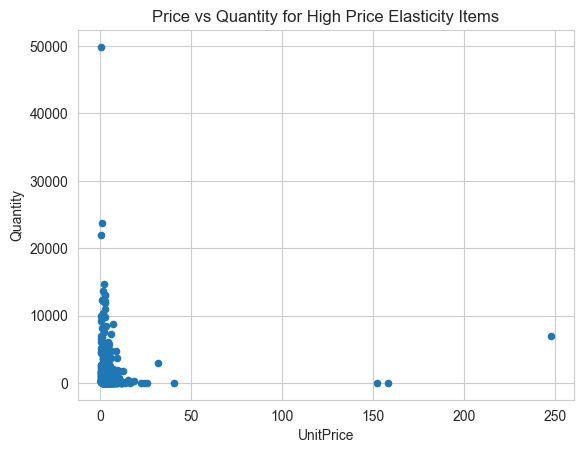

In [254]:
#plot scatter plot of high price elasticity items
plt.figure(figsize=(10, 6))
plt.show(high_items.plot.scatter(x='UnitPrice', y='Quantity', title='Price vs Quantity for High Price Elasticity Items'))


* View Items with low Elasticicty
* We can make a slight increase in Items with low elasticity which would not have too much impact in sales and will increase revenue

In [255]:
#print stock codes with low elasticity less than 5
low_items = yearly[yearly['PriceElasticity'] < 5]
print(low_items)

         StockCode  Year   UnitPrice  Quantity  PriceChange  QtyChange  \
1            10002  2011    1.002927       609    -0.164924   1.426295   
12           10125  2011    0.847711      1142    -0.107673   6.415584   
14           10133  2011    0.636667      2737    -0.219133  20.053846   
16           10135  2011    1.390000      1820    -0.080452   3.428224   
18           11001  2011    1.830865      1541    -0.252431  19.824324   
...            ...   ...         ...       ...          ...        ...   
6591            C2  2011   49.106870       132    -0.181552  12.200000   
6593      DCGS0003  2011    2.460000         2    -0.019920   0.000000   
6601           DOT  2011  278.493221       652    -0.390437  11.074074   
6612  gift_0001_40  2011   33.330000         2    -0.020858   1.000000   
6614  gift_0001_50  2011   41.670000         3    -0.020682   2.000000   

      PriceElasticity  
1           -8.648219  
12         -59.584079  
14         -91.514380  
16         -42.

<Figure size 1000x600 with 0 Axes>

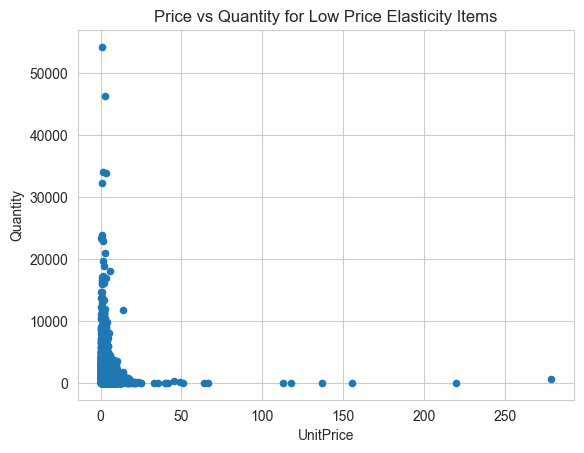

In [256]:
#scatter plot of low price elasticity items
plt.figure(figsize=(10, 6)) 
plt.show(low_items.plot.scatter(x='UnitPrice', y='Quantity', title='Price vs Quantity for Low Price Elasticity Items'))

---

# Marketing strategies

* We check which Countries it will be beneficial to focus marketing on 


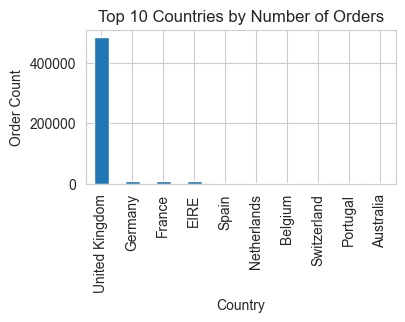

In [128]:
top_countries = df_copy['Country'].value_counts().head(10)
plt.figure(figsize=(4,2))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Number of Orders')
plt.xlabel('Country')
plt.ylabel('Order Count')
plt.show()

* EMERGING MARKETS

* We can see there is a large Increase in orders from 2010 to 2011

In [151]:
#count number of rows where year is 2010
count_2010 = df_copy[df_copy['InvoiceDate'].dt.year == 2010].shape[0]
print(f"Number of orders in 2010: {count_2010}")

Number of orders in 2010: 41480


In [138]:
#count number of rows where year is 2011
count_2011 = df_copy[df_copy['InvoiceDate'].dt.year == 2011].shape[0]
print(f"Number of orders in 2011: {count_2011}")

Number of orders in 2011: 488624


*We check for Countries and their Order counts for both years

In [150]:
country_order_count_2010 = df_copy[df_copy['InvoiceDate'].dt.year == 2010].groupby('Country').size().reset_index(name='OrderCount')
country_order_count_2010 = country_order_count_2010.sort_values(by='OrderCount', ascending=False)
print(country_order_count_2010)

            Country  OrderCount
22   United Kingdom       39224
10          Germany         512
9            France         434
7              EIRE         373
16           Norway         147
18         Portugal         116
3           Belgium          95
5            Cyprus          83
19            Spain          75
15      Netherlands          72
13            Japan          65
21      Switzerland          49
12            Italy          40
14        Lithuania          35
0         Australia          32
11          Iceland          31
20           Sweden          26
6           Denmark          20
8           Finland          17
4   Channel Islands          17
1           Austria           8
17           Poland           8
2           Bahrain           1


In [142]:
#count number of orders in 2011 for each country and sort by OrderCount
country_order_count_2011 = df_copy[df_copy['InvoiceDate'].dt.year == 2011].groupby('Country').size().reset_index(name='OrderCount')
country_order_count_2011 = country_order_count_2011.sort_values(by='OrderCount', ascending=False)
print(country_order_count_2011)


                 Country  OrderCount
35        United Kingdom      445899
14               Germany        8528
13                France        7973
10                  EIRE        7517
30                 Spain        2409
23           Netherlands        2287
3                Belgium        1936
32           Switzerland        1917
26              Portugal        1385
0              Australia        1150
24                Norway         924
6        Channel Islands         731
19                 Italy         718
12               Finland         668
7                 Cyprus         531
36           Unspecified         446
31                Sweden         425
1                Austria         390
9                Denmark         360
25                Poland         322
18                Israel         295
16             Hong Kong         284
20                 Japan         256
29             Singapore         222
33                   USA         179
17               Iceland         151
5

*Then We Calculate the percentage Increase from 2010 to 2011 to find emerging markets 

In [172]:
# Calculate percentage increase in orders per Country from 2010 to 2011 and round to whole number

orders_2010 = df_copy[df_copy['InvoiceDate'].dt.year == 2010].groupby('Country').size().reset_index(name='OrderCount_2010')
orders_2011 = df_copy[df_copy['InvoiceDate'].dt.year == 2011].groupby('Country').size().reset_index(name='OrderCount_2011')

orders = pd.merge(orders_2010, orders_2011, on='Country', how='outer').fillna(0)

num = orders['OrderCount_2011'] - orders['OrderCount_2010']
den = orders['OrderCount_2010'].replace(0, pd.NA)  # avoid div-by-zero → NA

# keep as nullable float, then round, then cast to nullable int
orders['PercentageIncrease'] = (num / den * 100).astype('Float64')
orders['PercentageIncrease'] = orders['PercentageIncrease'].round(0).astype('Int64')

print(orders[['Country','OrderCount_2010','OrderCount_2011','PercentageIncrease']].sort_values(by='PercentageIncrease', ascending=False))

                 Country  OrderCount_2010  OrderCount_2011  PercentageIncrease
1                Austria              8.0            390.0                4775
4        Channel Islands             17.0            731.0                4200
17                Poland              8.0            322.0                3925
8                Finland             17.0            668.0                3829
21           Switzerland             49.0           1917.0                3812
0              Australia             32.0           1150.0                3494
19                 Spain             75.0           2409.0                3112
15           Netherlands             72.0           2287.0                3076
3                Belgium             95.0           1936.0                1938
7                   EIRE            373.0           7517.0                1915
9                 France            434.0           7973.0                1737
6                Denmark             20.0           

<Figure size 1000x1000 with 0 Axes>

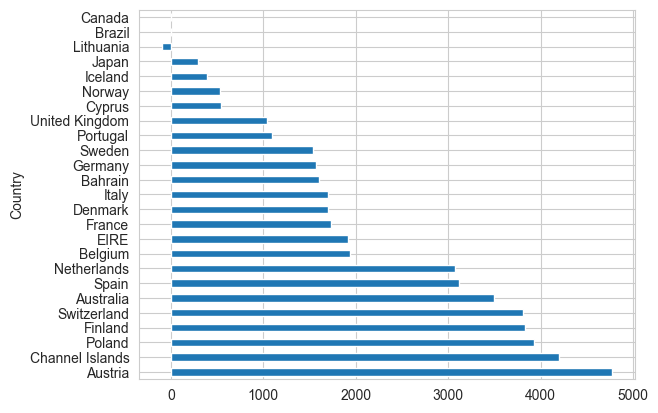

In [186]:
# Plot a horizontal bar chart of Percentage Increase in Orders by Country for top 25 countries
plt.figure(figsize=(10, 10)) 
plt.show(orders.head(25).sort_values(by='PercentageIncrease', ascending=False).plot(kind='barh', x='Country', y='PercentageIncrease', legend=False)) 

* From the table and chart, we can see that Markets like Austria, Channel Islands, Poland, Finland, Switzerland have a higher percentage increase in Orders from 2010 to 2012, while UK has a by far a conistent higher order count.

* Thus, we can recommend a 70:30 split in mraeting budget, with 70 going to Top order markets and 30 percent to high growth markets. 


* Increase marketing in the 4th Quater of the Year as that is the highest sales period

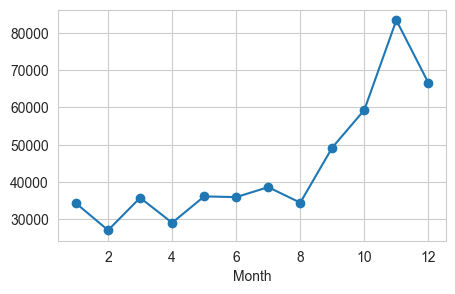

In [229]:
# line chart of monthly purchases
plt.figure(figsize=(5,3)) 
plt.show(monthly_purchases.plot(kind='line', marker='o'))   

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
